In [11]:
import gdown
import glob
import folium
import pandas as pd
import os
import numpy as np
import datetime 
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import *

**Load Mean Temperature Data For Stations.**

In [18]:
temp_filename = 'https://raw.githubusercontent.com/ielattar/Climate-Change/main/data/mean_temp.csv'
temp_df = pd.read_csv(temp_filename,engine='python').reset_index()
temp_df.drop(temp_df.columns[[1]], axis=1, inplace=True)
temp_df=temp_df.replace(-9999.9, np.nan)
temp_df=temp_df.dropna(axis=0, subset=['mean-temp(celsius)'])
temp_df.head(5)

,index,year,mean-temp(celsius),stnid,Station name,Prov,%Miss,Lat(deg),Long(deg),Elev(m),Joined,RCS
1,1,1914,4.1,1012010,COWICHAN_BAY_CHERRY_,BC,7.7,48.7,-123.5,0,n,n
2,2,1915,3.7,1012010,COWICHAN_BAY_CHERRY_,BC,7.7,48.7,-123.5,0,n,n
3,3,1916,1.2,1012010,COWICHAN_BAY_CHERRY_,BC,7.7,48.7,-123.5,0,n,n
4,4,1917,2.1,1012010,COWICHAN_BAY_CHERRY_,BC,7.7,48.7,-123.5,0,n,n
5,5,1918,3.7,1012010,COWICHAN_BAY_CHERRY_,BC,7.7,48.7,-123.5,0,n,n


**Find the Three Top Most Stations with highest record count by Province.**

In [15]:
temp_df_count=temp_df.groupby(['Prov','Station name']).size().sort_values(ascending=False).reset_index(name='count') 
sample_stations_df=temp_df_count.groupby('Prov').head(3)

**Filter The Mean Temperature Data Frame to only include the readings of the top stations.**

In [23]:
names_list = sample_stations_df['Station name'].values.tolist() 
name_list_str=','.join(names_list)
#print(name_list_str)
filtered_temp_df = temp_df[temp_df['Station name'].isin(names_list)]
filtered_temp_df.head(5)

,index,year,mean-temp(celsius),stnid,Station name,Prov,%Miss,Lat(deg),Long(deg),Elev(m),Joined,RCS
637,637,1899,2.4,1018621,VICTORIA,BC,0.3,48.6,-123.4,2,y,n
638,638,1900,4.5,1018621,VICTORIA,BC,0.3,48.6,-123.4,2,y,n
639,639,1901,4.1,1018621,VICTORIA,BC,0.3,48.6,-123.4,2,y,n
640,640,1902,4.5,1018621,VICTORIA,BC,0.3,48.6,-123.4,2,y,n
641,641,1903,3.5,1018621,VICTORIA,BC,0.3,48.6,-123.4,2,y,n


**Create a 2D scatterplot with an overlaid regression line For temperature over time per Province**

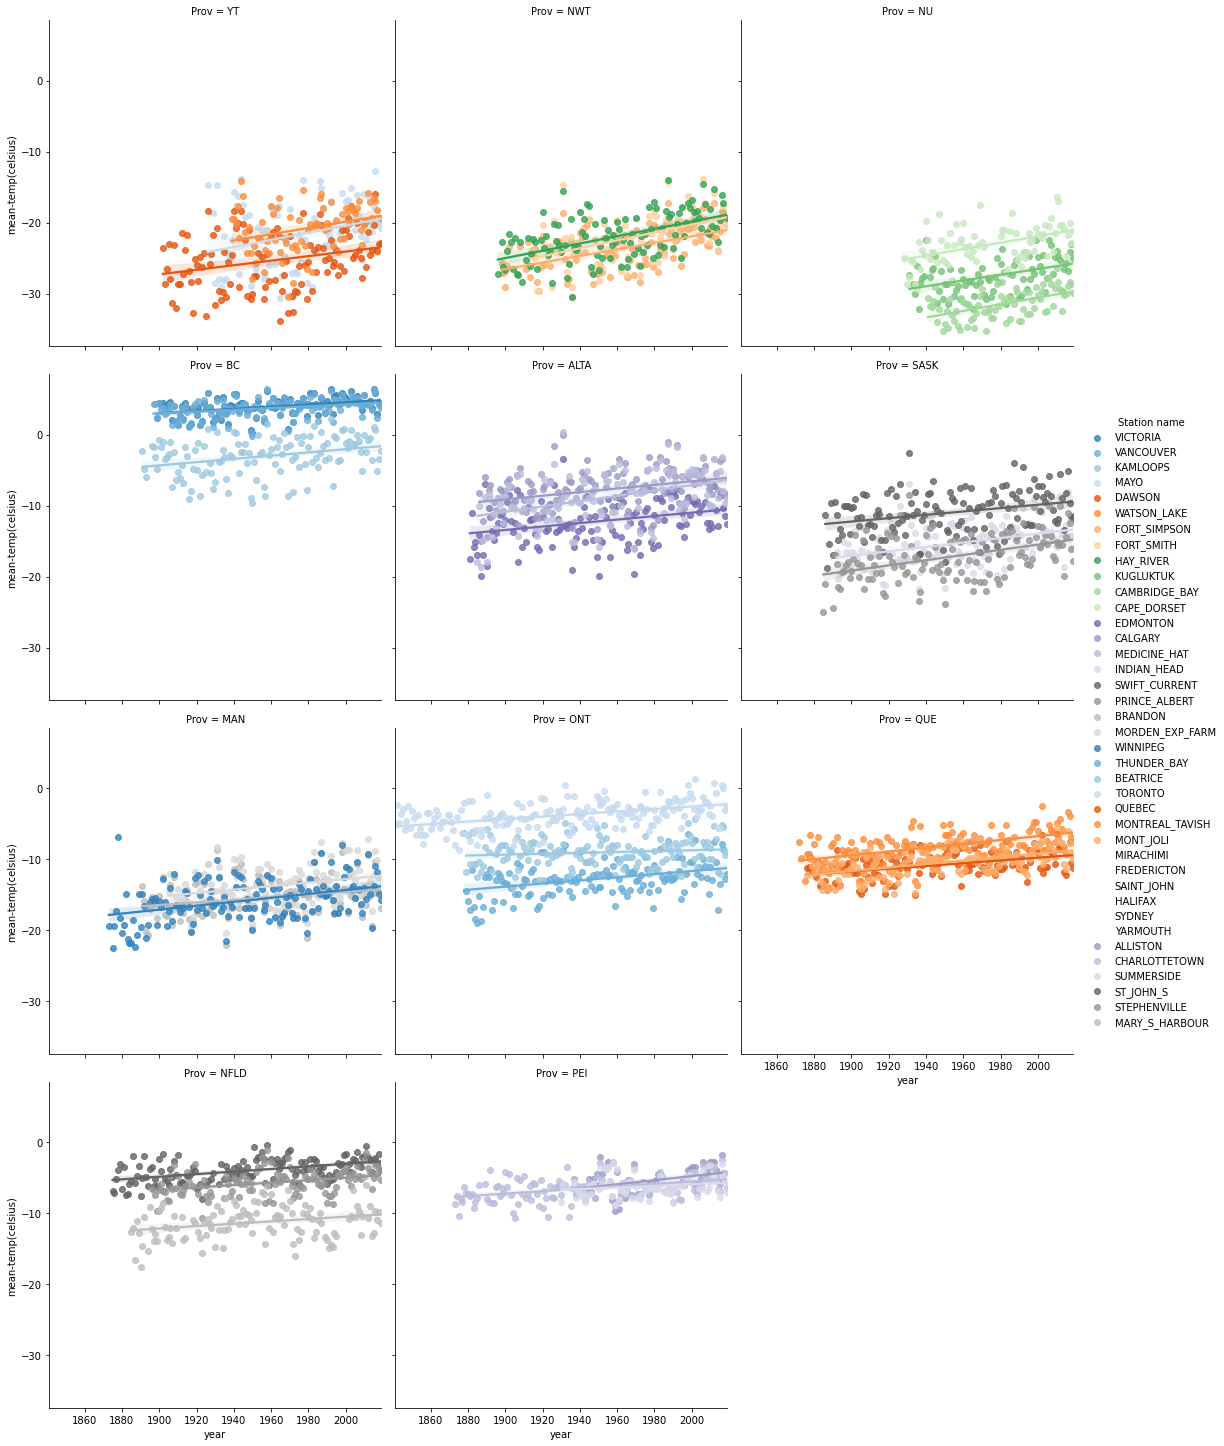

In [26]:
chart=sns.lmplot(
            x='year',
            y='mean-temp(celsius)',
            data=filtered_temp_df,
            col='Prov',
            hue='Station name',
            legend_out=True,
            palette="tab20c",
            col_wrap=3,
            col_order=["YT","NWT","NU","BC","ALTA","SASK","MAN","ONT","QUE","NFLD","PEI"]
        )
plt.show()

**Ceate a 2D line plot showing temperature trends over time per Province**

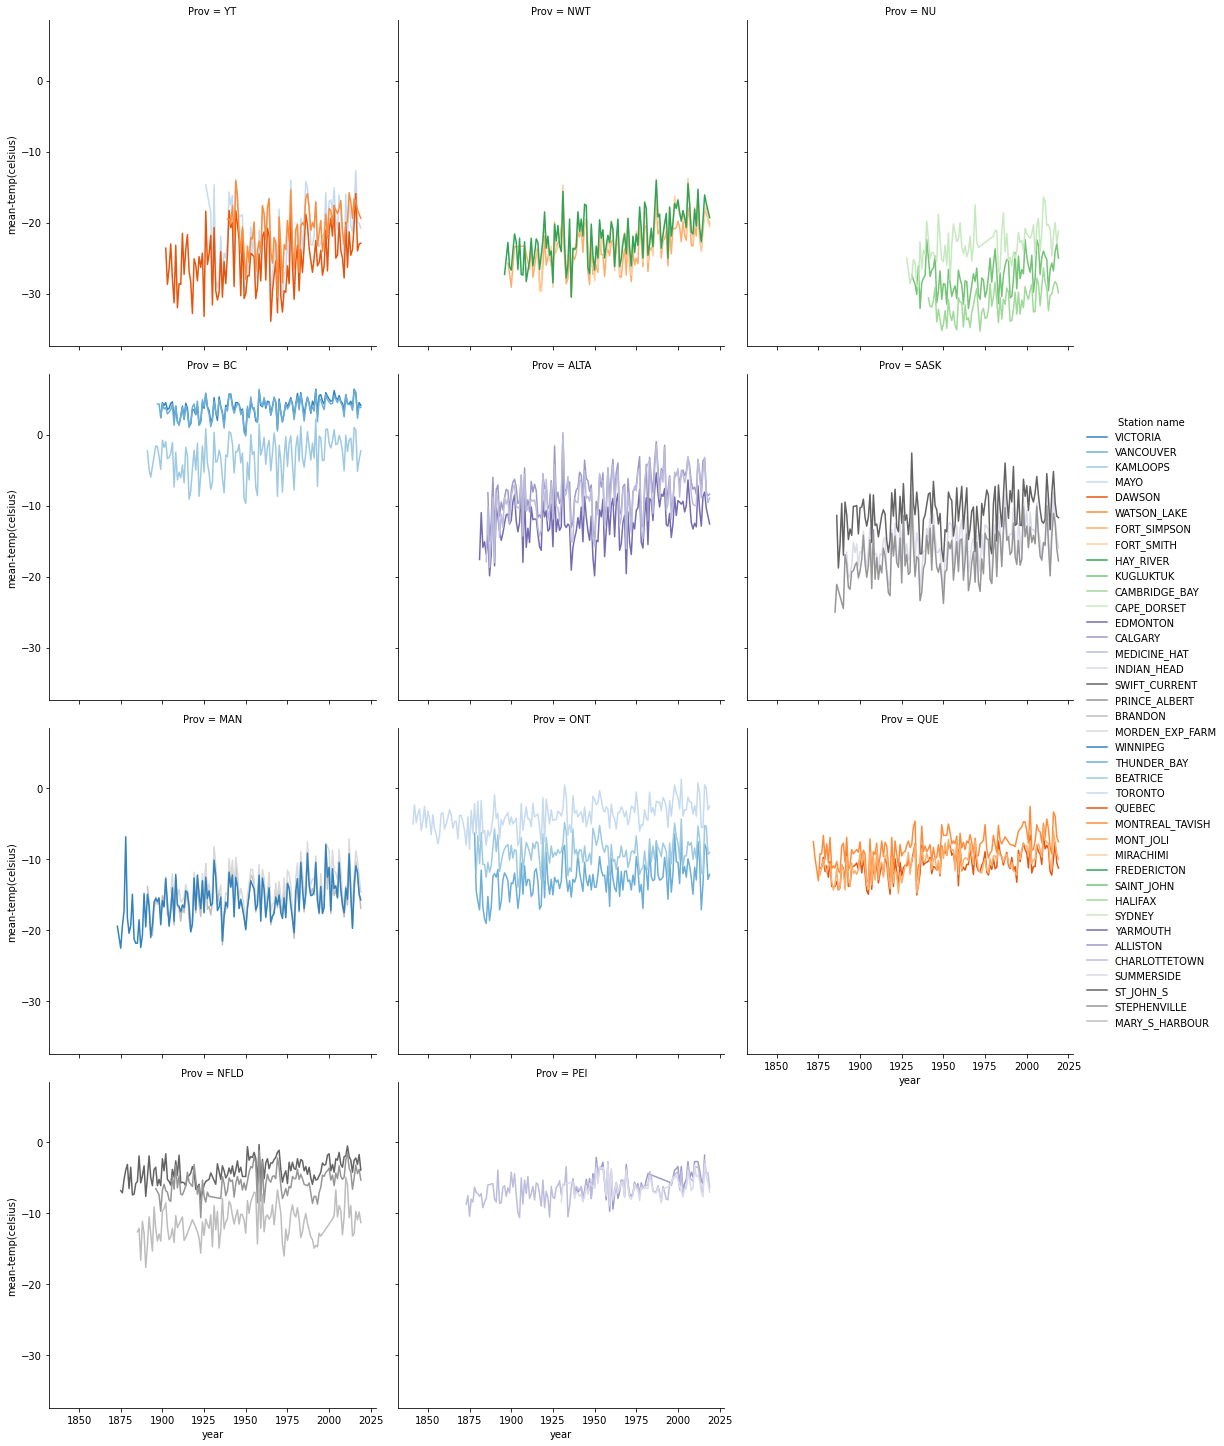

In [28]:
chart=sns.relplot(
            x='year',
            y='mean-temp(celsius)',
            data=filtered_temp_df,
            col='Prov',
            hue='Station name',
            kind="line",
            palette="tab20c",
            col_wrap=3,
            col_order=["YT","NWT","NU","BC","ALTA","SASK","MAN","ONT","QUE","NFLD","PEI"]
        )
plt.show()